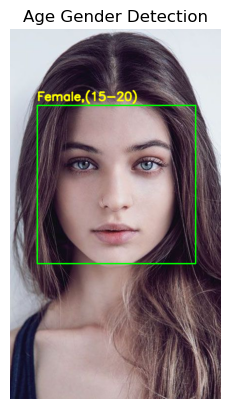

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained models for age and gender detection using OpenCV's DNN module
age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')

# Load the pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the lists of age groups and genders that the models will predict
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']

# Mean values for the models' input preprocessing
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Function to predict age and gender for faces in the image
def detect_age_gender(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    if len(faces) == 0:
        print("No faces detected.")
        return None

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = GENDER_LIST[gender_preds[0].argmax()]

        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = AGE_LIST[age_preds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return image

# Load an image from a file
image_path = 'fem.jpg'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Detect age and gender in the image
    output_image = detect_age_gender(image)

    # Check if output_image is None
    if output_image is None:
        print("Error: Failed to detect faces or predict age/gender.")
    else:
        # Display the output image using Matplotlib
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title('Age Gender Detection')
        plt.axis('off')  # Hide axes
        plt.show()
